In [1]:
"""
Exercise 1 - preprocessing. Removing the unnecessary columns and saving them for later plus loading dataframe
"""
import pandas as pd

baseDf = pd.read_csv('USCensus1990.data.csv')
externalVariablesArr = [baseDf.pop('dAge'), baseDf.pop('dHispanic'), baseDf.pop('iYearwrk'), baseDf.pop('iSex')]
baseDf.pop('caseid')

0            10000
1            10001
2            10002
3            10003
4            10004
            ...   
2458280    2468280
2458281    2468281
2458282    2468282
2458283    2468283
2458284    2468284
Name: caseid, Length: 2458285, dtype: int64

In [14]:
"""
Exercise 2 - Clustering the remaining columns and finding out which clustering method is king.
Before that, because data is categorial, we will use one hot encoding to make it continual.
For this exercise we will use gmm, kmeans, dbscan.
Because the database is massive, I'm unavailable often, and I have very little processing power, I've choosen to only use those 3 and calculate everything using a sample.
To determine which clustering dimension is best, we will use silleuhet score and david to determine the davies_bouldin_score.
Then we will compare the algorithms
"""
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd
from sklearn import datasets
import dunnsklearn
from sklearn.preprocessing import OneHotEncoder  
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
gmmSilhouetteArr = []
gmmDaviesBouldinArr = []
size = 24000
for i in range(0, 1):
    encoder = OneHotEncoder()
    testDf = encoder.fit_transform(baseDf.sample(size)).toarray()
    silhouetteArr = []
    daviesBouldinArr = []
    for j in range(2, 10):
        gmm = GaussianMixture(n_components=j)
        gmm.fit(testDf)
        labels = gmm.predict(testDf)
        daviesBouldinArr.append(davies_bouldin_score(testDf, labels))
        silhouetteArr.append(metrics.silhouette_score(testDf, labels))
    gmmSilhouetteArr.append(silhouetteArr)
    gmmDaviesBouldinArr.append(daviesBouldinArr)

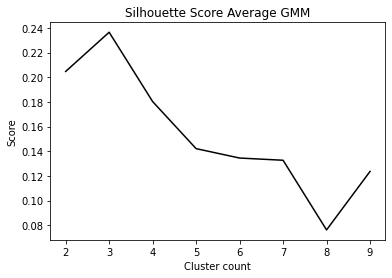

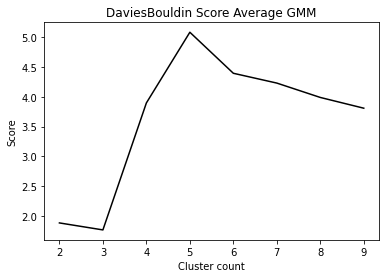

In [16]:
indexArr = [2,3,4,5,6,7,8,9]
averagedGmmSilhouetteArr = []
averagedGmmDaviesBouldinArr = []
for i in range(0, 8):
    averageScore = 0
    for j in range(0, 1):
        averageScore += gmmSilhouetteArr[j][i]
    averagedGmmSilhouetteArr.append(averageScore)
for i in range(0, 8):
    averageScore = 0
    for j in range(0, 1):
        averageScore += gmmDaviesBouldinArr[j][i]
    averagedGmmDaviesBouldinArr.append(averageScore)
fig, ax = plt.subplots()
plt.title("Silhouette Score Average GMM")
plt.xlabel("Cluster count")
plt.ylabel("Score")
ax.plot(indexArr, averagedGmmSilhouetteArr, color = "black", label="Silhouette Values")
plt.savefig('Silhouette Score Average GMM.svg', format='svg', dpi=1200)
fig, ax = plt.subplots()
plt.title("DaviesBouldin Score Average GMM")
plt.xlabel("Cluster count")
plt.ylabel("Score")
ax.plot(indexArr, averagedGmmDaviesBouldinArr, color = "black", label="DaviesBouldin Values")
plt.savefig('DaviesBouldin Score Average GMM.svg', format='svg', dpi=1200)

In [ ]:
"""
Exercise 2 - Clustering the remaining columns and finding out which clustering method is king.
Before that, because data is categorial, we will use one hot encoding to make it continual.
For this exercise we will use gmm, kmeans, dbscan.
Because the database is massive, I'm unavailable often, and I have very little processing power, I've choosen to only use those 3 and calculate everything using a sample.
To determine which clustering dimension is best, we will use silleuhet score and david to determine the davies_bouldin_score.
Then we will compare the algorithms
"""
import numpy as np
import pandas as pd
from sklearn import datasets
import dunnsklearn
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeansSilhouetteArr = []
kmeansDaviesBouldinArr = []
size = 24000
for i in range(0, 10):
    testDf = baseDf.sample(size)
    silhouetteArr = []
    daviesBouldinArr = []
    for j in range(2, 16):
        kmeans = KMeans(n_clusters=j)
        kmeans.fit(testDf)
        labels = kmeans.labels_
        daviesBouldinArr.append(davies_bouldin_score(testDf, labels))
        silhouetteArr.append(metrics.silhouette_score(testDf, labels))
    kmeansSilhouetteArr.append(silhouetteArr)
    kmeansDaviesBouldinArr.append(daviesBouldinArr)


In [ ]:
indexArr = [range(2,16)]
averagedKmeansSilhouetteArr = []
averagedKmeansDaviesBouldinArr = []
for i in range(2, 16):
    averageScore = 0
    for j in range(0, 10):
        averageScore += kmeansSilhouetteArr[j][i]
    averagedKmeansSilhouetteArr.append(averageScore)
for i in range(2, 16):
    averageScore = 0
    for j in range(0, 10):
        averageScore += kmeansDaviesBouldinArr[j][i]
    averagedKmeansDaviesBouldinArr.append(averageScore)
plt.title("Silhouette Score Average KMeans")
plt.xlabel("Cluster count")
plt.ylabel("Score")
plt.plot(kmeans)
